<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/assessment_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

import sklearn
sklearn.set_config(transform_output="pandas")


!pip install category_encoders -q


%matplotlib inline

from sklearn.pipeline import Pipeline, make_pipeline



from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

import sys
if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
import dtreeviz


from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error



from sklearn.impute import SimpleImputer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline

from category_encoders import TargetEncoder
from category_encoders import OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ParameterGrid

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##DATA/DOMAIN UNDERSTANDING AND EXPLORATION

In [4]:
#  load and view the first 5 rows
df_aut = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adverts.csv')


In [5]:
# Sample observation and check correct parsing of data
df_aut.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [10]:
# Identify qualitative and quantitative features
df_aut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [11]:
# Analyse data distribution
df_aut.describe()


,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [6]:
# rename data frame
df1 = df_aut
# create lists for for visualisation
num = ['mileage', 'year_of_registration']
cat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type', 'crossover_car_and_van','fuel_type']



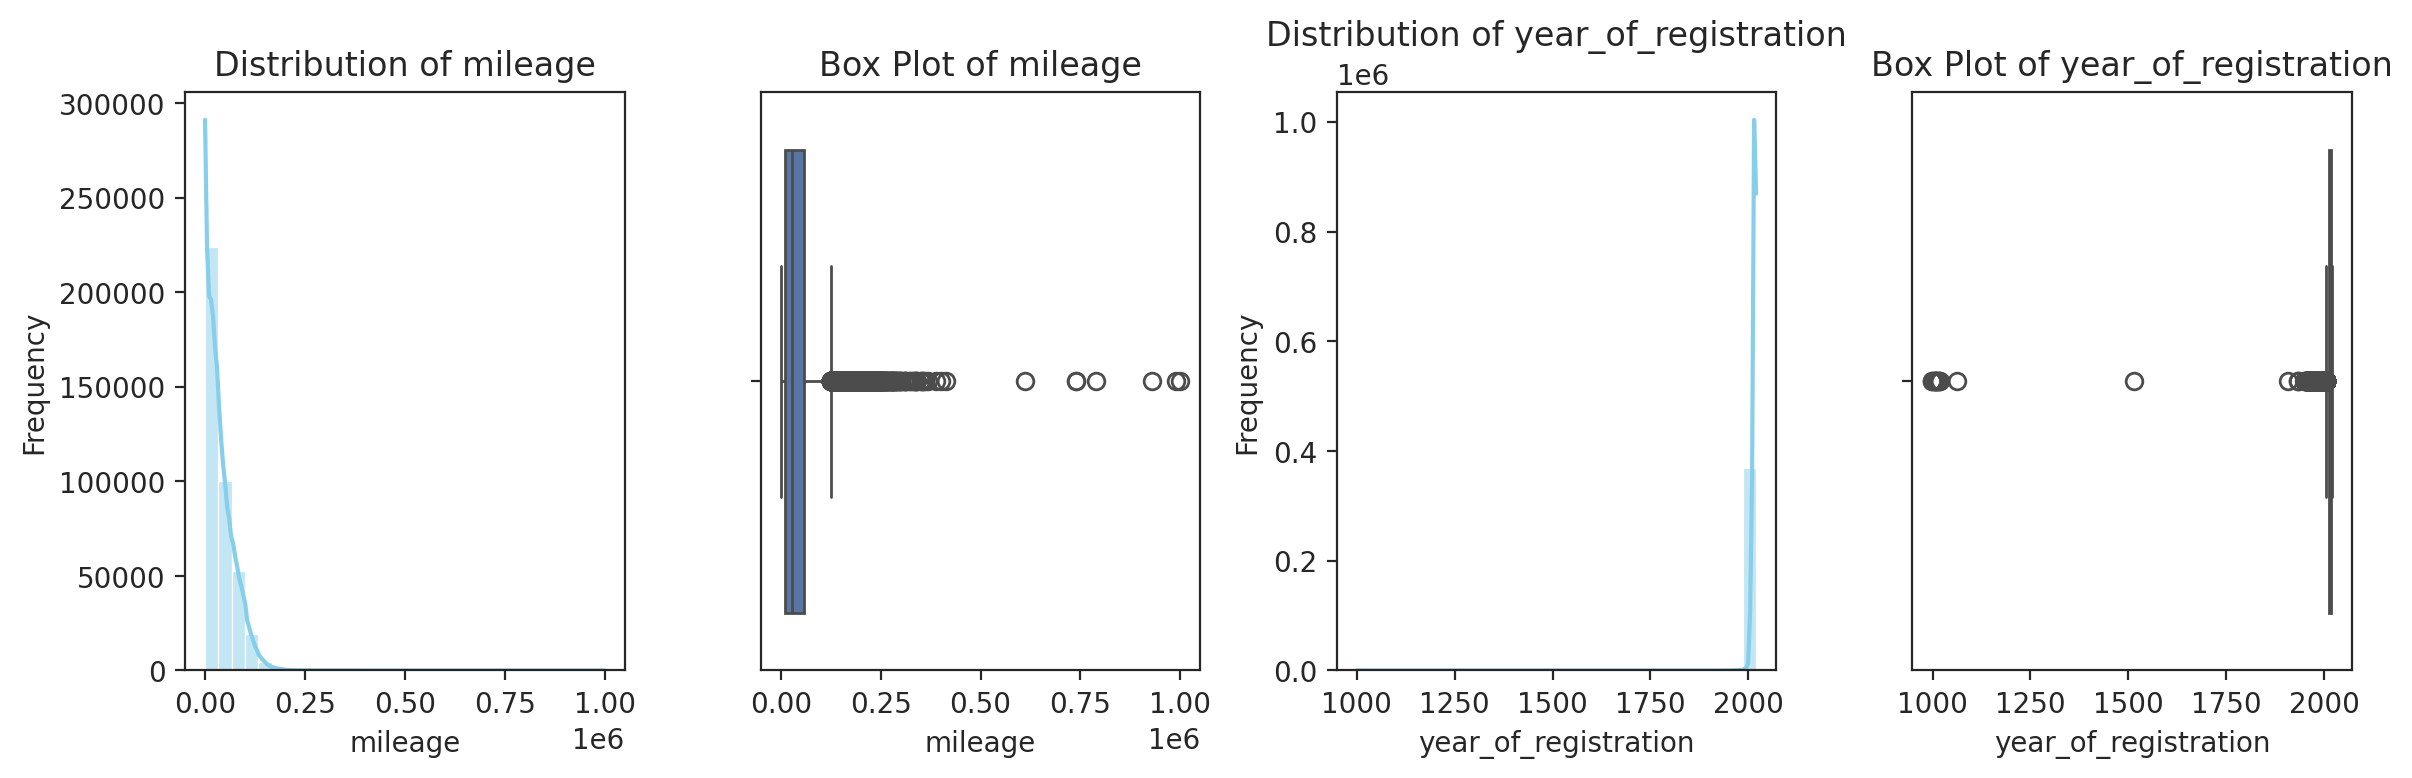

In [13]:
# Visualize the Distribution of of first list using boxplots and histplot

# Set up a 1x4 subplot layout (1 rows, 4 columns)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

# Loop through numerical features and analyze its distribution
for i, column in enumerate(df1[num].columns):
    # Visualize the distribution using a histogram in the first row
    sns.histplot(df1[num][column], bins=30, kde=True, color='skyblue', ax=axes[i*2])
    axes[i*2].set_title(f'Distribution of {column}')
    axes[i*2].set_xlabel(column)
    axes[i*2].set_ylabel('Frequency')

    # Add a box plot to the second row
    sns.boxplot(x=df1[num][column], ax=axes[i*2+1], showfliers=True)
    axes[i*2+1].set_title(f'Box Plot of {column}')
    axes[i*2+1].set_xlabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

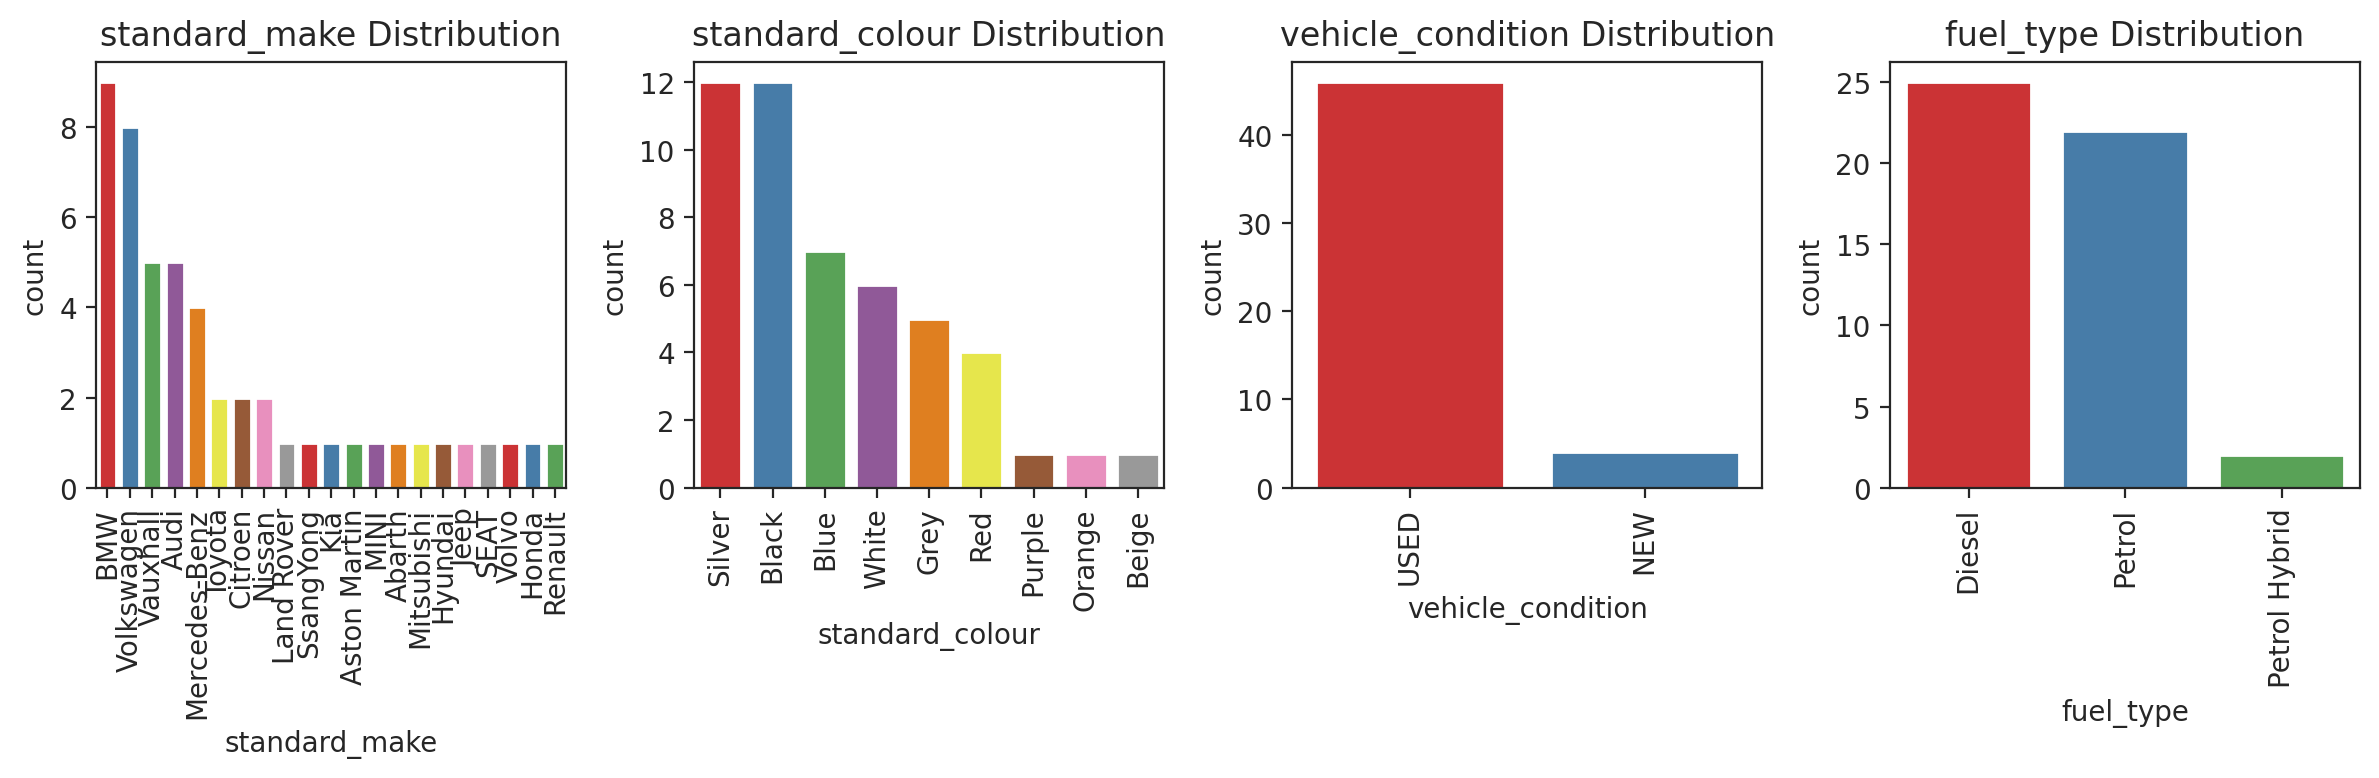

In [14]:
# Visualize Categorical features using countplot (bar plots)

categorical_features = ['standard_make', 'standard_colour', 'vehicle_condition', 'fuel_type']

# Randomly sample a subset of your data (adjust the sample size as needed)
sample_size = 50


# Calculate the number of rows and columns for the subplots grid
num_rows = 1
num_cols = 4

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4))

# Flatten the axes array to simplify indexing in the loop
# axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Sample the data for the current feature
    sampled_data = df1[feature].sample(n=sample_size, random_state=42)

    # Create a count plot for the current feature on the corresponding subplot
    sns.countplot(x=sampled_data, order=sampled_data.value_counts().index, palette="Set1", ax=axes[i])
    axes[i].set_title(f'{feature} Distribution')

    # Rotate x-axis labels for better visibility
    axes[i].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()

**Analysis of Predictive Power of Features**

In [8]:
# Calculate correlation matrix
corr_matrix = df1.corr()
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
target_corr


price                    1.000000
mileage                  0.160204
year_of_registration     0.102341
public_reference         0.052344
crossover_car_and_van    0.010402
Name: price, dtype: float64

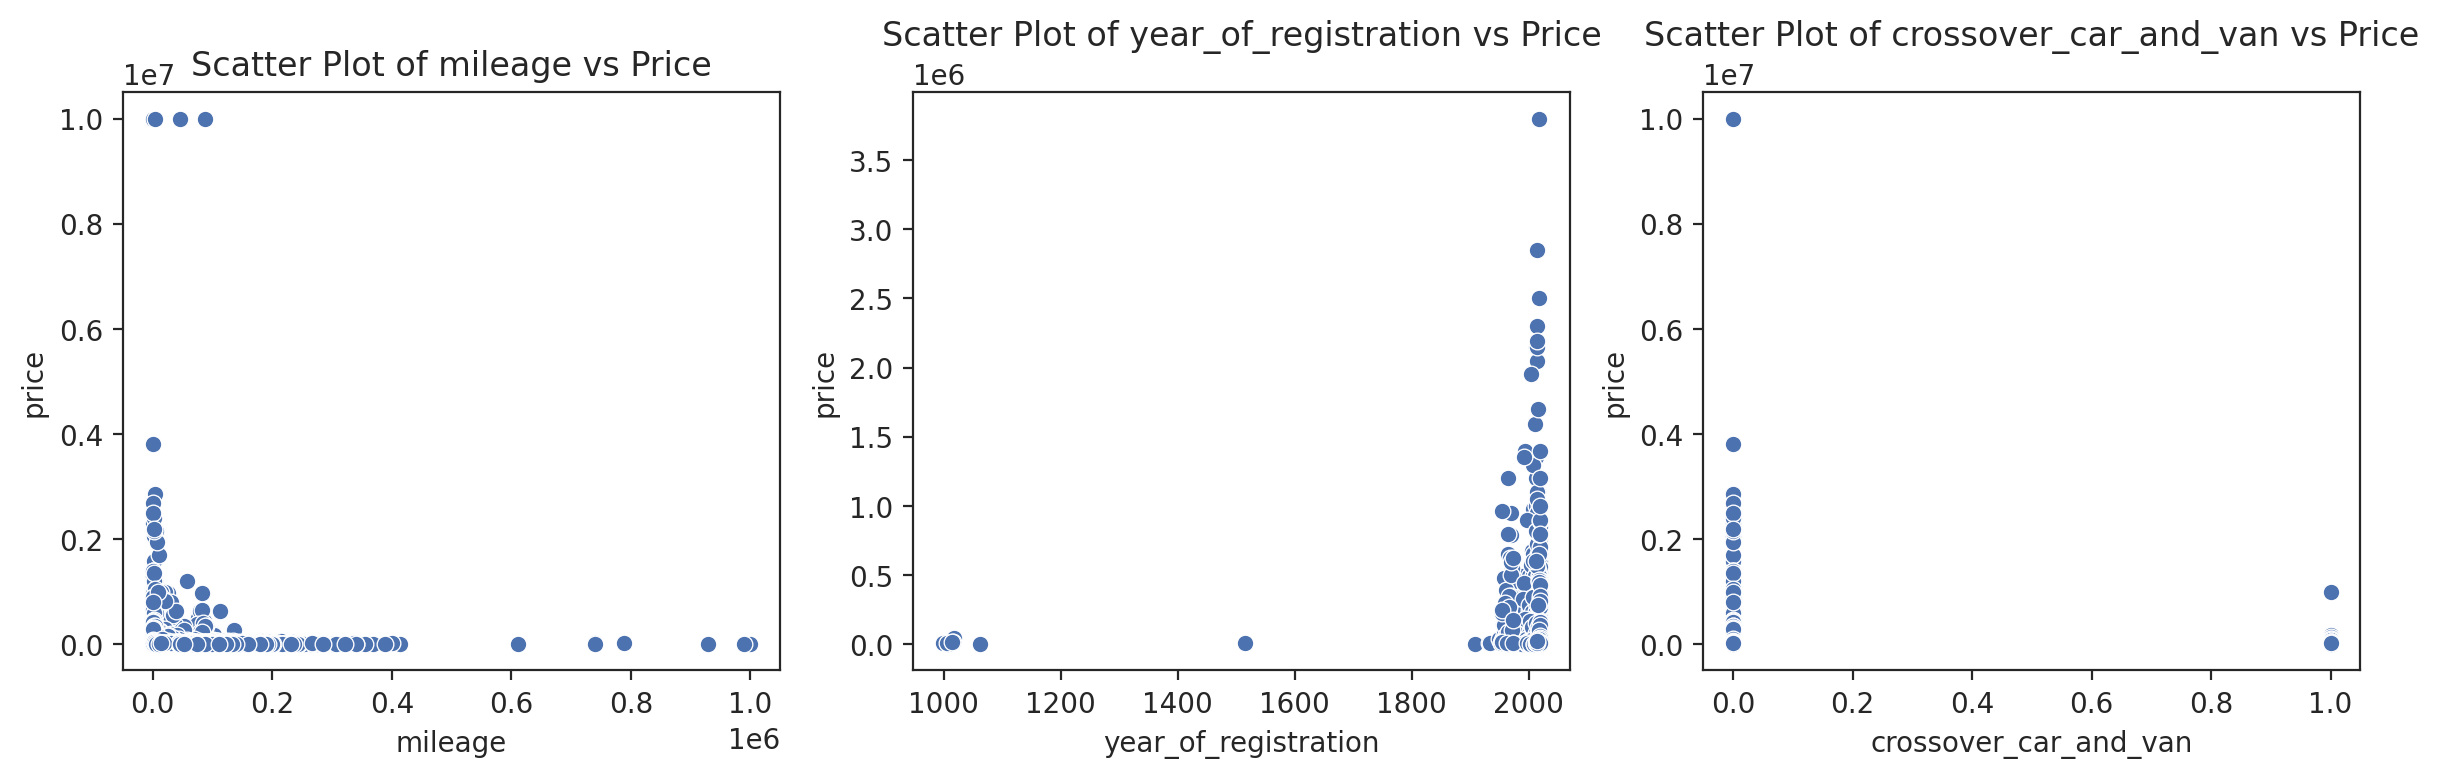

In [15]:
# Plot scatter plot

num = ['mileage', 'year_of_registration','crossover_car_and_van']

# Create a 1x4 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot scatter plots for each pair of numerical variables
for i, var in enumerate(num):
    sns.scatterplot(x=var, y='price', data=df1, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {var} vs Price')

# Adjust layout
plt.tight_layout()
plt.show()



**Analysis of Predictive Power of Categorical Features**

In [6]:
# reload data
dfe = df_aut


In [5]:
# Fill missing values

mean = dfe["mileage"].mean().round(1)
dfe['mileage'] = dfe["mileage"].replace(0.0, mean )
dfe['mileage'] = dfe["mileage"].replace(np.nan, mean )

other_feat = ['reg_code', 'standard_colour', 'standard_make','standard_model','vehicle_condition', 'body_type','fuel_type', 'year_of_registration']

mode = dfe [other_feat].mode().iloc[0]
dfe[other_feat] = dfe[other_feat].replace(np.nan, mode )

# view data frame
dfe.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,37743.6,17,Grey,Volvo,XC90,NEW,2017.0,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [6]:
# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' removes the first category to avoid multicollinearity
encoded_features = encoder.fit_transform(dfe[['standard_colour', 'standard_make' , 'standard_model','vehicle_condition']])

# Create a DataFrame with encoded features and the target variable
df_encoded = pd.concat([
                        pd.DataFrame(encoded_features,
                                     columns=encoder.get_feature_names_out([
                                                                            'standard_colour', 'standard_make', 'standard_model',
                                                                            'vehicle_condition'])),
                                                                             dfe['price']],
                                                                             axis=1)

correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['price'].abs().sort_values(ascending=False)
target_correlation

# Left out since computational resources did not all it to run completely
# Create a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(df_encoded.corr(), annot=True, cmap='viridis', linewidths=.5)
# plt.title('Heatmap of Encoded Features')
# plt.show()


price                      1.000000
standard_model_3500        0.339049
standard_model_275         0.339049
standard_model_Miura       0.339049
standard_model_959         0.339049
                             ...   
standard_model_Abarth      0.000012
standard_colour_Navy       0.000008
standard_model_Boxer       0.000008
standard_make_Beauford     0.000008
standard_model_Series 3    0.000008
Name: price, Length: 1299, dtype: float64

**# Get more information about the data**

In [ ]:
# Get more information about the data

# Check for missing values and convert to data frame
missing_value_counts_df = pd.DataFrame(df1.isnull().sum(), columns=['Missing Value Count'])
missing_value_counts_df

,Missing Value Count
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


In [ ]:
# get unique values and display in data frame
unique_counts_df = pd.DataFrame(df1.nunique(), columns=['Unique'])
unique_counts_df

,Unique
public_reference,402005
mileage,80634
reg_code,72
standard_colour,22
standard_make,110
standard_model,1168
vehicle_condition,2
year_of_registration,84
price,30578
body_type,16


In [ ]:
# get data frame info, convert to data frame and concatenate all in a data frame

import io
buf = io.StringIO()
df1.info(buf=buf)
a = buf.getvalue()
lines = [line.split() for line in a.splitlines()[3:-2]]
df_inf = pd.DataFrame(lines).drop(columns = 0)
df_inf = df_inf.drop(1)


# Set the first row as the header
df_inf.columns = df_inf.iloc[0]

# Drop row 0
df_inf = df_inf.drop(0)

# set column features as index
df_inf = df_inf.set_index('Column')

# Concatenate along the rows (axis=0)
result = pd.concat([df_inf, unique_counts_df, missing_value_counts_df], axis =1, ignore_index=False)

result

,Non-Null,Count,Dtype,Unique,Missing Value Count
public_reference,402005,non-null,int64,402005,0
mileage,401878,non-null,float64,80634,127
reg_code,370148,non-null,object,72,31857
standard_colour,396627,non-null,object,22,5378
standard_make,402005,non-null,object,110,0
standard_model,402005,non-null,object,1168,0
vehicle_condition,402005,non-null,object,2,0
year_of_registration,368694,non-null,float64,84,33311
price,402005,non-null,int64,30578,0
body_type,401168,non-null,object,16,837


In [ ]:
# Calculate Descriptive Statistics
df1.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


##Data Processing for Machine Learning

In [7]:
# rename data frame
df2 = df1

# Remove outliers for "mileage"
lo, hi = df2["mileage"].quantile([0.1, 0.9])
mask_mileage = df2["mileage"].between(lo, hi)

df = df2[mask_mileage]

In [8]:
# subset price t0 <= 20000

mask_price = df["price"] <= 20_000
df = df[ mask_price]

<Axes: xlabel='mileage'>

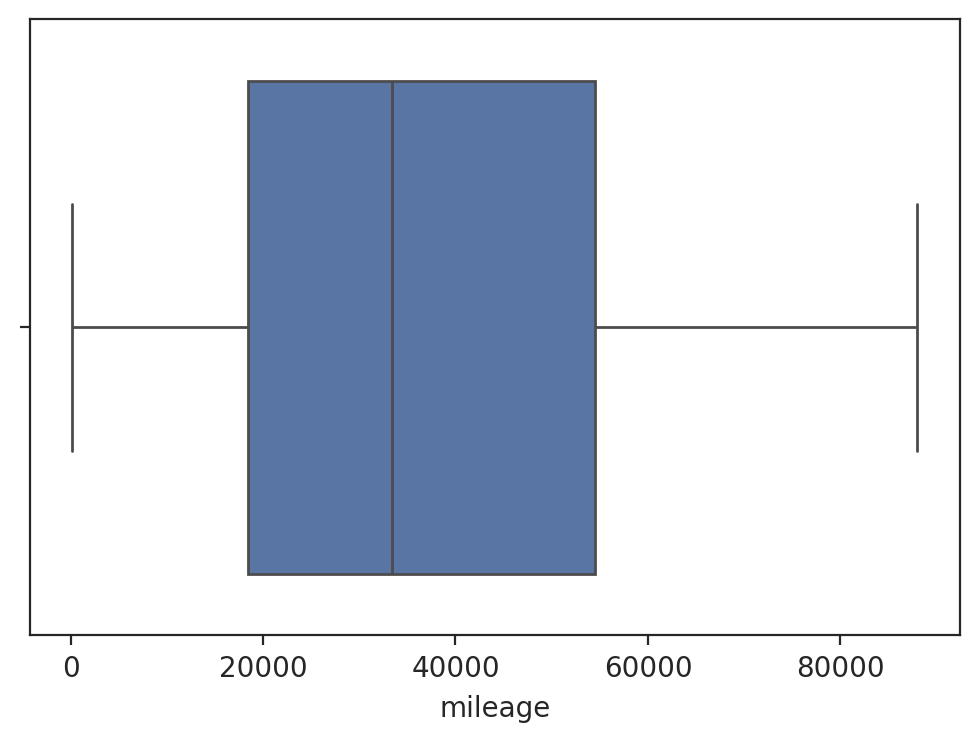

In [9]:
sns.boxplot(x=df['mileage'])

In [9]:
# Check for high cardinality
df.nunique()

public_reference         250231
mileage                   66237
reg_code                     67
standard_colour              21
standard_make                78
standard_model              847
vehicle_condition             1
year_of_registration         75
price                     12458
body_type                    15
crossover_car_and_van         2
fuel_type                     8
dtype: int64

In [10]:
# Drop columns coloums with high cardinality
df = df.drop(columns = ['public_reference','reg_code'])
df.head()


,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
6,24075.0,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
10,77000.0,Grey,Volkswagen,Passat,USED,2010.0,4499,Saloon,False,Diesel
11,24487.0,Black,Peugeot,208,USED,2017.0,8795,Hatchback,False,Petrol


In [11]:
# Apply the mask to filter to set the minimum count threshold
filt_df = df[df['standard_make'].map(df['standard_make'].value_counts()) > 10]

filt_df = df[df['standard_model'].map(df['standard_model'].value_counts()) > 10]

**From predictive power analysis, select 'mileage', 'standard_make', and 'standard_model'  as features and 'price' as target**

In [12]:
# create lists for numerical and categorical features
df_m = filt_df

target = 'price'
cat_feat = ["standard_model"]
num_feat = ['mileage']



In [13]:
# Select feature matrix and target vector
X = df_m[cat_feat + num_feat]
y = df_m[target]

In [14]:
# Split data to training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
# Further split the training data into a smaller subset for grid search
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

##Model Building

In [16]:
# Create pipeline for numerical features
num_xformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer())
    ]
)

In [17]:
# Create pipeline for categorical features
cat_xformer = Pipeline(
    steps=[
           ("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder(sparse_output=False, drop='if_binary')),
    ]
)

In [18]:
cat_xformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='if_binary', sparse_output=False))])

In [19]:
# create a preprocessor to combine both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_xformer, num_feat),
        ("cat", cat_xformer, cat_feat),
    ]
)

In [22]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer())]),
                                 ['mileage']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False))]),
                                 ['standard_model'])])

**Add KNN Predictor**

In [24]:
# Append KNN regressor to pipeline
knn_pred = Pipeline([
                      ("preprocessor", preprocessor),
                      ("knn", KNeighborsRegressor(n_neighbors=5))
                    ])

knn_pred

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['standard_model'])])),
                ('knn', KNeighborsRegressor())])

In [25]:
knn_pred.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['mileage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 sparse_output=False))]),
                                                  ['standard_model'])])),
                ('knn', KNeighborsRegressor())])

In [27]:
knn_pred.score(X_test, y_test)

0.18073612761508295

In [1]:
knn_pred.score(X_train, y_train)

NameError: name 'knn_pred' is not defined

In [24]:
# Include grid search into the pipeline
param_grid = {
              'knn__n_neighbors': [5,8,10,11],  # 'knn__' is used to specify the parameter for the KNeighborsRegressor
              'knn__weights': ['uniform', 'distance']
            }

search_cv = RandomizedSearchCV(
                                knn_pred,
                                param_grid,
                                return_train_score=True,
                                scoring='neg_mean_absolute_error',
                                random_state=0

                              )
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer())]),
                                                                               ['mileage']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OneHotEncoder(drop='if_binary',
                                                                                                              sparse_output=False))]),
                                                                               ['standard_model'])])),
                                             ('knn', KNeighborsRegressor())]),
                   param_distributions={'knn__n_neighbors': [5, 8, 10, 11],
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [25]:
knn_gs_results = search_cv.fit(X_train_subset, y_train_subset)

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature
y = 3 * X.squeeze() + np.random.randn(100) * 2  # Target variable with some noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into a smaller subset for grid search
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # Step 1: Standardize the features
    ('knn', KNeighborsRegressor())        # Step 2: KNeighborsRegressor
])

# Define the parameter grid to search
param_grid = {
    'knn__n_neighbors': [1, 3, 5, 7, 9],  # 'knn__' is used to specify the parameter for the KNeighborsRegressor
    'knn__weights': ['uniform', 'distance']
}

# Initialize GridSearchCV with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the subset of training data for grid search
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_estimator.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
print(f'Best Parameters: {best_params}')
print(f'Best Mean Squared Error: {mse}')
